### Homework 1 - Question 5 - Luke Arend

First we implement Gram-Schmidt.

In [1]:
import numpy as np

In [2]:
def add_column(X):
    if X.shape[0] == X.shape[1]:
        return X
        
    v = np.random.randn(X.shape[0])
    for u in X.T:
        v -= np.dot(u, v) * u
    v /= np.sqrt(np.dot(v, v))
    
    X = np.append(X.T, [v], axis=0).T
    return add_column(X)

def gramschmidt(n):
    X = np.zeros((n, 0))
    return add_column(X)

Next we generate a 3x3 orthonormal matrix $U$ using Gram-Schmidt.

In [3]:
np.random.seed(0)
U = gramschmidt(3)
U

array([[ 0.85771824,  0.27400307,  0.43501924],
       [ 0.1945646 ,  0.61021592, -0.7679721 ],
       [ 0.47588238, -0.74334302, -0.47008203]])

We plot the columns of $U$ to see whether they are orthogonal and unit length.

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

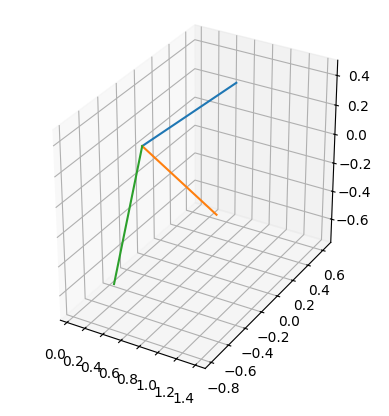

In [5]:
#%matplotlib notebook
ax = plt.subplot(projection='3d')
for i in range(3):
    plt.plot(xs=[0, U[0, i]], ys=[0, U[1, i]], zs=[0, U[2, i]])
plt.axis('square')
plt.show()

$U$ appears to be orthonormal based on the figure above.

Let's show that $U$ is orthonormal for dimensionality N = 1000.

In [6]:
%%time
U = gramschmidt(1000)

CPU times: user 1.84 s, sys: 616 ms, total: 2.45 s
Wall time: 2.21 s


In [7]:
np.allclose(np.dot(U, U.T), np.identity(1000))

True

$U$ is orthonormal since the inverse of $U$ is its transpose.

Also note that each row and column of $U$ has magnitude 1.

In [8]:
np.allclose(1, np.sqrt(np.sum(U * U, axis=0)))

True

In [9]:
np.allclose(1, np.sqrt(np.sum(U * U, axis=1)))

True